In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
from tqdm import tqdm
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

plt.rcParams['axes.grid'] = True
plt.style.context('Solarize_Light2')

roots = [3.64095690650721,
        3.5184492410503965,
        3.393522159945615,
        3.2659503538230608,
        3.1354715107049764,
        3.0017774197047054,
        2.8645022087095424,
        2.7232065461969945,
        2.577356059664392,
        2.426291319035178,
        2.2691853142129728, 
        2.104982167992544, 
        1.932307699120554,
        1.749339162933206, 
        1.5536238493280832, 
        1.34187327905057, 
        1.109960313758399, 
        0.8541630993606272, 
        0.5762735442012712, 
        0.2885386111960936, 
        0.03198372863548067]
jds = [1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.0, -0.1, -0.2, -0.3, -0.4, -0.5, -0.6, -0.7, -0.8, -0.9, -1.0]
get_crit_T = dict(zip(jds, roots))

num_temps = 100
Jds = [0.0, -0.1, -0.2, -0.3, -0.4, -0.5, -0.6, -0.7, -0.8, -0.9]

In [4]:
### re-label of data

num_conf = 512
opt = 'test'

for Jd in Jds:
    for L in [20,30,60,80,120]:
        T_c = get_crit_T[Jd]
        T = np.round(np.linspace(T_c - 0.3, T_c + 0.3, num_temps), 4)
        for j in range(num_temps):
            path2 = f'data_spins/{Jd}_{opt}/answ_{L}_{T[j]}_modified_more.npy'
            answ = np.zeros((num_conf))
            for i in range(num_conf):
                answ[i] = float(T[-10] < T[j])
            np.save(path2, answ)

In [5]:
### compress (new) data

L = [20, 30, 60, 80, 120]
opt = 'test'
num_temps = 100

for l in L:
    for Jd in Jds:
        print(f'Start compressing for L = {l}, Jd = {Jd}')

        T_c = get_crit_T[Jd]
        T = np.round(np.linspace(T_c - 0.3, T_c + 0.3, num_temps), 4)
        
        T_miss = []
        for j in range(num_temps):
            path = f'data_spins/{Jd}_{opt}/answ_{l}_{T[j]}_modified_more.npy'
            if not os.path.isfile(path):
                T_miss.append(T[j])

        if len(T_miss) == 0:
            ys = []
            for j in range(num_temps):
                path = f'data_spins/{Jd}_{opt}/answ_{l}_{T[j]}_modified_more.npy'
                with open(path, 'rb') as f:
                    y_j = np.load(f)
                    ys.append(y_j)
                os.remove(path)

            savez_dict = dict()
            for j, y_j in enumerate(ys):
                savez_dict[f'T_{j}'] = y_j
        else:
            print(f'I wont do it. Jd = {Jd}, L = {l}')
        np.savez_compressed(f'data_spins/{Jd}_{opt}/answ_{l}_{T[0]}_{T[-1]}_modified_more', **savez_dict)

Start compressing for L = 20, Jd = 0.0
Start compressing for L = 20, Jd = -0.1
Start compressing for L = 20, Jd = -0.2
Start compressing for L = 20, Jd = -0.3
Start compressing for L = 20, Jd = -0.4
Start compressing for L = 20, Jd = -0.5
Start compressing for L = 20, Jd = -0.6
Start compressing for L = 20, Jd = -0.7
Start compressing for L = 20, Jd = -0.8
Start compressing for L = 20, Jd = -0.9
Start compressing for L = 30, Jd = 0.0
Start compressing for L = 30, Jd = -0.1
Start compressing for L = 30, Jd = -0.2
Start compressing for L = 30, Jd = -0.3
Start compressing for L = 30, Jd = -0.4
Start compressing for L = 30, Jd = -0.5
Start compressing for L = 30, Jd = -0.6
Start compressing for L = 30, Jd = -0.7
Start compressing for L = 30, Jd = -0.8
Start compressing for L = 30, Jd = -0.9
Start compressing for L = 60, Jd = 0.0
Start compressing for L = 60, Jd = -0.1
Start compressing for L = 60, Jd = -0.2
Start compressing for L = 60, Jd = -0.3
Start compressing for L = 60, Jd = -0.4
Sta

In [13]:
Jd = 0.0
opt = 'train'
l = 4
T_c = get_crit_T[Jd]
T = np.round(np.linspace(T_c - 0.3, T_c + 0.3, num_temps), 4)
path = f'data_spins/{Jd}_{opt}/spins_4_2.1025.npz'
with open(path, 'rb') as f:
    x = np.load(f)
    for j in range(2048):
        y = x[f'{j}']
        print(y.shape)

(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)

In [12]:
spins_loaded = np.load(f'data_spins/{Jd}_{opt}/spins_{20}_{T[0]}_{T[-1]}.npz')
for j in range(num_temps):
    x = spins_loaded[f'T_{j}']
    print(x.shape)

(2048, 20, 20)
(2048, 20, 20)
(2048, 20, 20)
(2048, 20, 20)
(2048, 20, 20)
(2048, 20, 20)
(2048, 20, 20)
(2048, 20, 20)
(2048, 20, 20)
(2048, 20, 20)
(2048, 20, 20)
(2048, 20, 20)
(2048, 20, 20)
(2048, 20, 20)
(2048, 20, 20)
(2048, 20, 20)
(2048, 20, 20)
(2048, 20, 20)
(2048, 20, 20)
(2048, 20, 20)
(2048, 20, 20)
(2048, 20, 20)
(2048, 20, 20)
(2048, 20, 20)
(2048, 20, 20)
(2048, 20, 20)
(2048, 20, 20)
(2048, 20, 20)
(2048, 20, 20)
(2048, 20, 20)
(2048, 20, 20)
(2048, 20, 20)
(2048, 20, 20)
(2048, 20, 20)
(2048, 20, 20)
(2048, 20, 20)
(2048, 20, 20)
(2048, 20, 20)
(2048, 20, 20)
(2048, 20, 20)
(2048, 20, 20)
(2048, 20, 20)
(2048, 20, 20)
(2048, 20, 20)
(2048, 20, 20)
(2048, 20, 20)
(2048, 20, 20)
(2048, 20, 20)
(2048, 20, 20)
(2048, 20, 20)
(2048, 20, 20)
(2048, 20, 20)
(2048, 20, 20)
(2048, 20, 20)
(2048, 20, 20)
(2048, 20, 20)
(2048, 20, 20)
(2048, 20, 20)
(2048, 20, 20)
(2048, 20, 20)
(2048, 20, 20)
(2048, 20, 20)
(2048, 20, 20)
(2048, 20, 20)
(2048, 20, 20)
(2048, 20, 20)
(2048, 20,

In [15]:
### delete directory from jupyter notebook

import shutil

opt = 'test'
for j in range(num_temps):
    shutil.rmtree(f'data_spins/{Jd}_{opt}/spins_4_{T[j]}')

### Cython compilation

In [1]:
%load_ext cython

In [2]:
%%cython -a --cplus --compile-args=-std=c++11 -I</home/ddsukhoverkhova/.conda/envs/mc_lib_env/lib/python3.7/site-packages/mc_lib>
cimport cython
import numpy as np
cimport numpy as cnp

from libc.math cimport exp, tanh
from mc_lib.rndm cimport RndmWrapper
from mc_lib.lattices import tabulate_neighbors
from mc_lib.observable cimport RealObservable

import time
import os


cdef RndmWrapper rndm = RndmWrapper((1234, 0)) # global variable
    
cdef void init_spins(cnp.int32_t[::1] spins): 
    
    for j in range(spins.shape[0]):
        spins[j] = 1 if rndm.uniform() > 0.5 else -1
        
        
        
@cython.boundscheck(False)
@cython.wraparound(False)
cdef double energy(cnp.int32_t[::1] spins, 
                   cnp.int32_t[:, ::1] neighbors,
                  const double[:,::1] Js):

    cdef:
        double ene = 0.0
        Py_ssize_t site, site1, num_neighb

    for site in range(spins.shape[0]):
        num_neighb = neighbors[site, 0]
        for j in range(1, num_neighb+1):
            site1 = neighbors[site, j]
            ene += -1 * Js[site, site1] * spins[site] * spins[site1] 
    
    return ene / 2.0

@cython.boundscheck(False)
@cython.wraparound(False)
cdef void tabulate_ratios(double[::1] ratios1,
                      double[::1] ratios2,
                      double beta,
                      int nDim1,
                      int nDim2, 
                      double Jd):
    cdef:
        int summ
    for summ in range(-nDim1, nDim1+1, 2):
        ratios1[summ + nDim1] = exp(-2.0*beta * summ)
    for summ in range(-nDim2, nDim2+1, 2):
        ratios2[summ + nDim2] = exp(-2.0*beta * summ * Jd)


@cython.boundscheck(False)
@cython.wraparound(False)
cdef void flip_spin(cnp.int32_t[::1] spins, 
                    cnp.int32_t[:, ::1] neighbors,
                    double beta,
                    const double[:,::1] Js,
                    const double[::1] ratios1,
                    const double[::1] ratios2,
                    int nDim1,
                    int nDim2): 
    cdef:
        Py_ssize_t site = int(spins.shape[0] * rndm.uniform())
        Py_ssize_t site1

    cdef int num_neighb = neighbors[site, 0]
    cdef long summ1 = 0 # J
    cdef long summ2 = 0 # Jd
    for j in range(1, num_neighb + 1):
        site1 = neighbors[site, j]
        if Js[site,site1] == 1.0: # FIXME: wider range of J
            summ1 += spins[site1] #* spins[site] * Js[site,site1]
        else:
            summ2 += spins[site1]
    
    cdef double ratio = ratios1[nDim1 + summ1 * spins[site]] * ratios2[nDim2 + summ2 * spins[site]] #exp(-2.0 * beta * summ )
    
    if ratio < 1:
        if rndm.uniform() > ratio:
            return

    spins[site] *= -1
    
    
cdef void get_J( double[:,::1] Js, double J, double Jd, int L1, int L2 , int L3 = 1):
  
    if L3 == 1:
        for i in range(L1*L2):
            Js[i, ((i // L2 + 1) % L1 * L2 )  + (i + 1) % L2 ] = Jd
            Js[i, ((i // L2  - 1) % L1 * L2 )  + (i - 1) % L2 ] = Jd
            Js[i, (i // L2) * L2 + (i + 1) % L2] = J 
            Js[i, (i + L2) % (L1*L2)] = J
            Js[i, (i // L2) * L2 + (i - 1) % L2] = J
            Js[i, (i - L2) % (L1*L2)] = J
        return
    
    else:
        return

@cython.boundscheck(False)
@cython.wraparound(False)
@cython.cdivision(False)
cdef _simulate(Py_ssize_t L,
             double T, double J, double Jd,
             Py_ssize_t num_sweeps,
             Py_ssize_t num_conf, 
             str path):

    cdef: 
        double start = time.time()
        double end, tmp

    cdef:
        cnp.int32_t[:, ::1] neighbors = np.asarray(tabulate_neighbors(L, kind='triang'), np.int32)
        #cnp.int32_t[:, ::1] neighbors = np.asarray(tabulate_neighbors((L, L, 1), kind='sc'), np.int32)
        double beta = 1./T
        int nDim1 = 4 # J #max(neighbors[:, 0])
        int nDim2 = 2 # Jd

    cdef:
        int num_therm = int(20*L**2.15)
        int steps_per_sweep = int(L * L)
        int sweep = 0
        int i
        # double av_en = 0., Z = 0., magn = 0., av_magn=0.

    cdef cnp.int32_t[::1] spins =  np.empty( L*L, dtype=np.int32) 
    init_spins(spins)
    
    cdef double[:,::1] Js = np.zeros((L*L, L*L)) 
    get_J(Js, J, Jd, L, L)

    cdef double[::1] ratios1 = np.empty(nDim1+1 , dtype=float)
    cdef double[::1] ratios2 = np.empty(nDim2+1 , dtype=float)
    tabulate_ratios(ratios1, ratios2, beta, nDim1, nDim2, Jd)

    #cdef signed char[:,::1] res = np.empty((num_conf, L*L), dtype=np.int8)

    for sweep in range(num_therm):
        for i in range(steps_per_sweep):
            flip_spin(spins, neighbors, beta, Js, ratios1, ratios2, nDim1, nDim2)
    end = time.time()
    print('Thermalization time : ', end - start)
    for conf in range(num_conf):
        tmp = time.time()
        for sweep in range(num_sweeps):
            for i in range(steps_per_sweep):
                flip_spin(spins, neighbors, beta, Js, ratios1, ratios2, nDim1, nDim2)
        end = time.time()
        print('One configuration time:', end - tmp, 'conf = ', conf)
        #res[conf, :] = spins
        new_path = path + str(conf) + '.npy'
        if not os.path.isfile(new_path):
            np.save(new_path, spins)
    
    end = time.time()
    print('Total time: ', end - start)
        
    #return (res)

def simulate(L, T, J, Jd, num_sweeps, num_conf, path):
    _simulate(L, T, J, Jd, num_sweeps, num_conf, path)


### Plot a configuration

In [11]:
spins = np.loadtxt('data_spins/-0.3_test/spins_20_1.4554.npz')

In [12]:
plt.matshow(spins['2'], cmap = 'Greys')

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [5]:
spins = np.load('data_spins/0.0_train/spins_20_1.9692_2.5692.npz')

In [6]:
Jd = 0.0
T_c = get_crit_T[Jd]
T = np.round(np.linspace(T_c - 0.3, T_c + 0.3, num_temps), 4)

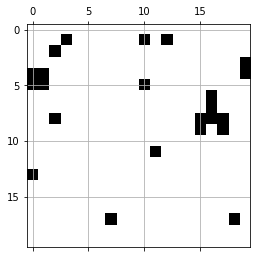

In [14]:
plt.matshow(spins[f'T_{0}'][-519, :, :], cmap = 'Greys')

### Numerical calculation of $T_c$

In [2]:
res = []

In [3]:
from scipy import optimize

def F(M):
    t = 0.3
    J = 1.0
    return np.sinh(2*J/t) * np.sinh(2*M/t) - 1

In [4]:
sol=optimize.root(F,1.0)
res.append(sol.x[0])
res

[0.0003817903465175049]

In [55]:
0.03125/2/2/2/2/2/2

0.00048828125

In [5]:
from scipy import optimize

def F(t):
    M = 0.0004
    J = 1.0
    return np.sinh(2*J/t) * np.sinh(2*M/t) - 1

In [6]:
res = []
sol=optimize.root(F,0.25)
res.append(sol.x[0])
res

[0.3018336135076354]

In [59]:
J = 1.0
M = 0.0004
t = 0.3018336135076354
print(np.sinh(2*J/t) * np.sinh(2*M/t))

1.0000000000000002


### Re-label: two probabilities

In [ ]:
answ_loaded = np.load(f'data_spins/{Jd}_{opt}/answ_{l}_{T[0]}_{T[-1]}.npz')

In [7]:
roots = [2.2691853142129728, 2.104982167992544, 1.932307699120554, 1.749339162933206, 1.5536238493280832, 1.34187327905057, 1.109960313758399, 0.8541630993606272, 0.5762735442012712, 0.2885386111960936, 0.03198372863548067]
jds = [0.0, -0.1, -0.2, -0.3, -0.4, -0.5, -0.6, -0.7, -0.8, -0.9, -1.0]
get_crit_T = dict(zip(jds, roots))
num_temps = 100
#Jds = [-0.1, -0.2, -0.3, -0.4, -0.5, -0.6, -0.7, -0.8, -0.9]
Jds = [0.0]

num_conf = 2048
opt = 'train'

for Jd in Jds:
    for L in [20,30,60,80,100,120]:
        T_c = get_crit_T[Jd]
        T = np.round(np.linspace(T_c - 0.3, T_c + 0.3, num_temps), 4)
        for j in range(num_temps):
            path2 = f'data_spins/{np.round(Jd, 2)}_{opt}/answ_{L}_{T[j]}.npy' 
            answ = np.zeros((num_conf, 2))
            for i in range(num_conf):
                answ[i, 0] = float(T_c < T[j])
                answ[i, 1] = float(T_c >= T[j])
            np.save(path2, answ)

In [8]:
print(path2)

data_spins/0.0_train/answ_120_2.5692.npy


### Compressing data: one directory per temperature

In [4]:
L = [20]
opt = 'test'
num_temps = 100

for l in L:
    for Jd in [0.1]:
        #Jd = np.round(Jd, 2)
        print(f'Start compressing for L = {l}, Jd = {Jd}')

        T_c = get_crit_T[Jd]
        T = np.round(np.linspace(T_c - 0.3, T_c + 0.3, num_temps), 4)

        T_miss = []
        for j in range(num_temps):
            path = f'data_spins/{Jd}_{opt}/answ_{l}_{T[j]}.npy'
            if not os.path.isfile(path):
                T_miss.append(T[j])

        if len(T_miss) == 0:
            ys = []
            for j in range(num_temps):
                path = f'data_spins/{Jd}_{opt}/answ_{l}_{T[j]}.npy'
                with open(path, 'rb') as f:
                    y_j = np.load(f)
                    ys.append(y_j)
                os.remove(path)

            savez_dict = dict()
            for j, y_j in enumerate(ys):
                savez_dict[f'T_{j}'] = y_j
        else:
            print(f'I wont do it. Jd = {Jd}, L = {l}')
        np.savez_compressed(f'data_spins/{Jd}_{opt}/answ_{l}_{T[0]}_{T[-1]}', **savez_dict)

Start compressing for L = 20, Jd = 0.1


In [7]:
def compress(L, Jd, T_, num_temps, num_conf, opt):
    # create .npz file for 1 temperature 
    #opt = 'test'
    #num_temps = 100

    # print(f'Start compressing for L = {L}, Jd = {Jd}, T = {T_}')

    xs = []
    for j in range(num_conf):
        path = f'data_spins/{Jd}_{opt}/spins_{L}_{T_}/{j}.npy'
        with open(path, 'rb') as f:
            x_j = np.load(f)
            x_j = np.reshape(x_j, (-1, L))
            xs.append(x_j)
        # os.remove(path)
    # os.rmdir(f'data_spins/{Jd}_{opt}/spins_{L}_{T_}/')
    # savez_dict = dict()
    # for j, x_j in enumerate(xs):
    #     savez_dict[f'{j}'] = x_j

    np.save(f'data_spins/{Jd}_{opt}/spins_{L}_{T_}.npy', xs)
    
# L = 20
# Jd = 0.1
# T_ = 1.4493
# num_temps = 100
# num_conf = 512
# opt = 'test'
# compress(L, Jd, T_, num_temps, num_conf, opt)

In [8]:
roots = [3.64095690650721,
        3.5184492410503965,
        3.393522159945615,
        3.2659503538230608,
        3.1354715107049764,
        3.0017774197047054,
        2.8645022087095424,
        2.7232065461969945,
        2.577356059664392,
        2.426291319035178,
        2.2691853142129728, 
        2.104982167992544, 
        1.932307699120554,
        1.749339162933206, 
        1.5536238493280832, 
        1.34187327905057, 
        1.109960313758399, 
        0.8541630993606272, 
        0.5762735442012712, 
        0.2885386111960936, 
        0.03198372863548067]
jds = [1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.0, -0.1, -0.2, -0.3, -0.4, -0.5, -0.6, -0.7, -0.8, -0.9, -1.0]
get_crit_T = dict(zip(jds, roots))

num_temps = 100
num_conf = 512
L = 20
Jd = 0.1
T_c = get_crit_T[Jd]
T = np.round(np.linspace(T_c - 0.3, T_c + 0.3, num_temps), 4)
opt = 'test'
for j in tqdm(range(num_temps)):
    T_ = T[j]
    compress(L, Jd, T_, num_temps, num_conf, opt)

  0%|          | 0/100 [00:00<?, ?it/s]


FileNotFoundError: [Errno 2] No such file or directory: 'data_spins/0.1_test/spins_20_2.1263/0.npy'

In [105]:
def compress_all(L, Jd, T_c, num_temps, num_conf, opt):
    T = np.round(np.linspace(T_c - 0.3, T_c + 0.3, num_temps), 4)
    # print(f'Start compressing for L = {L}, Jd = {Jd}')
    
    xs = []
    for j in range(num_temps):
        path = f'data_spins/{Jd}_{opt}/spins_{L}_{T[j]}.npy'
        spins_t = np.load(path, allow_pickle=True)
        xs.append(spins_t)
        #os.remove(path)

    savez_dict = dict()
    for j, x_j in enumerate(xs):
        savez_dict[f'T_{j}'] = x_j

    np.savez_compressed(f'data_spins/{Jd}_{opt}/spins_{L}_{T[0]}_{T[-1]}', **savez_dict)

In [106]:
roots = [3.64095690650721,
        3.5184492410503965,
        3.393522159945615,
        3.2659503538230608,
        3.1354715107049764,
        3.0017774197047054,
        2.8645022087095424,
        2.7232065461969945,
        2.577356059664392,
        2.426291319035178,
        2.2691853142129728, 
        2.104982167992544, 
        1.932307699120554,
        1.749339162933206, 
        1.5536238493280832, 
        1.34187327905057, 
        1.109960313758399, 
        0.8541630993606272, 
        0.5762735442012712, 
        0.2885386111960936, 
        0.03198372863548067]
jds = [1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.0, -0.1, -0.2, -0.3, -0.4, -0.5, -0.6, -0.7, -0.8, -0.9, -1.0]
get_crit_T = dict(zip(jds, roots))

num_temps = 100
num_conf = 512
L = 30
Jd = 0.5
T_c = get_crit_T[Jd]
T = np.round(np.linspace(T_c - 0.3, T_c + 0.3, num_temps), 4)
opt = 'test'
for j in tqdm(range(num_temps)):
    T_ = T[j]
    compress_all(L, Jd, T_c, num_temps, num_conf, opt)

100%|██████████| 100/100 [09:29<00:00,  5.69s/it]


In [119]:
Jd = 0.5
opt = 'test'
path = f'data_spins/{Jd}_{opt}/spins_20_2.7018_3.3018.npz'
with open(path, 'rb') as f:
    x = np.load(f)
    print(x['T_0'].shape)

(512, 20, 20)


In [110]:
Jd = -0.5
opt = 'test'
path = f'data_spins/{Jd}_{opt}/spins_20_1.0419_1.6419.npz'
with open(path, 'rb') as f:
    x = np.load(f)
    lst = x.files
    print(x[lst[0]])

[[[-1. -1. -1. ... -1. -1. -1.]
  [-1. -1. -1. ... -1. -1. -1.]
  [-1. -1. -1. ... -1. -1. -1.]
  ...
  [-1. -1. -1. ... -1. -1. -1.]
  [-1. -1. -1. ... -1. -1. -1.]
  [-1. -1. -1. ... -1. -1. -1.]]

 [[-1. -1. -1. ... -1. -1. -1.]
  [-1. -1. -1. ... -1. -1. -1.]
  [-1. -1. -1. ... -1. -1. -1.]
  ...
  [-1. -1. -1. ... -1. -1. -1.]
  [-1. -1. -1. ...  1. -1. -1.]
  [-1. -1. -1. ... -1. -1. -1.]]

 [[-1. -1. -1. ... -1. -1. -1.]
  [-1. -1. -1. ... -1. -1. -1.]
  [-1. -1. -1. ... -1. -1. -1.]
  ...
  [-1. -1. -1. ... -1. -1. -1.]
  [-1. -1. -1. ... -1. -1. -1.]
  [ 1. -1. -1. ... -1. -1. -1.]]

 ...

 [[-1. -1. -1. ... -1. -1. -1.]
  [-1. -1. -1. ... -1. -1. -1.]
  [-1. -1. -1. ... -1. -1. -1.]
  ...
  [-1. -1. -1. ... -1. -1. -1.]
  [-1. -1. -1. ... -1. -1. -1.]
  [-1. -1. -1. ... -1. -1. -1.]]

 [[-1. -1. -1. ... -1. -1. -1.]
  [-1. -1. -1. ... -1. -1. -1.]
  [-1. -1. -1. ... -1. -1. -1.]
  ...
  [-1. -1. -1. ... -1. -1. -1.]
  [-1. -1. -1. ... -1. -1. -1.]
  [-1. -1. -1. ... -1. -1. -

### Compressing data: all in .npy

In [8]:
%%time

L = [20]
# L = [20]
#Jds = [0.0, -0.1, -0.2, -0.3, -0.4, -0.5, -0.6, -0.7, -0.8]
#Jds = [-0.1, -0.2, -0.3, -0.4, -0.5]
Jds = [0.1]
# Jds = [0.0625, 0.125]#, 0.25, 0.5, 0.75, 1.0, 1.5]
opt = 'test'
num_temps = 100

for l in L:
    for Jd in Jds:

        #Jd = np.round(Jd, 2)
        print(f'Start compressing for L = {l}, Jd = {Jd}')

        T_c = get_crit_T[Jd]
        T = np.round(np.linspace(T_c - 0.3, T_c + 0.3, num_temps), 4)
        #T = np.round(np.linspace(0.03, 3.5, num_temps), 4)
        #T = np.round(np.linspace(T_c - 10**-2.0, T_c + 10**-2.0, num_temps), 5)

        xs = []
        for j in range(num_temps):
            path = f'data_spins/{Jd}_{opt}/spins_{l}_{T[j]}.npy'
            with open(path, 'rb') as f:
                x_j = np.load(f)
                xs.append(x_j)
            #os.remove(path)

        savez_dict = dict()
        for j, x_j in enumerate(xs):
            savez_dict[f'T_{j}'] = x_j

        np.savez_compressed(f'data_spins/{Jd}_{opt}/spins_{l}_{T[0]}_{T[-1]}', **savez_dict)

        ys = []
        for j in range(num_temps):
            path = f'data_spins/{Jd}_{opt}/answ_{l}_{T[j]}.npy'
            with open(path, 'rb') as f:
                y_j = np.load(f)
                ys.append(y_j)
            os.remove(path)

        savez_dict = dict()
        for j, y_j in enumerate(ys):
            savez_dict[f'T_{j}'] = y_j

        np.savez_compressed(f'data_spins/{Jd}_{opt}/answ_{l}_{T[0]}_{T[-1]}', **savez_dict)

Start compressing for L = 20, Jd = 0.1
CPU times: user 1.76 s, sys: 431 ms, total: 2.19 s
Wall time: 2.88 s


### Test: F(t) with $J_d>0$

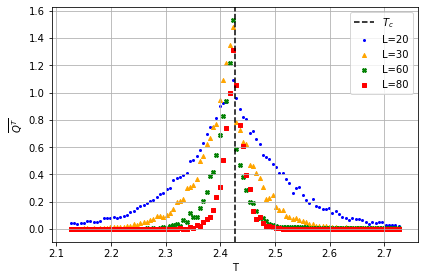

In [5]:
Jd = 0.1
T_c = get_crit_T[Jd]
T = np.linspace(T_c - 0.3, T_c + 0.3, num_temps)

# opt_epochs = np.load('opt_epochs.npy', allow_pickle='TRUE').item()
# epochs = opt_epochs[Jd]

epochs = [5, 5, 5, 5]

markers=['.', '^', 'X', 's', '*', 'p']
colors=['blue', 'orange', 'green', 'red', 'm', 'gold']

Ls = [20, 30, 60, 80]

errs_ = []
outs_ = []

def errs(errs):
    return np.array([sum(errs[i*512:(i+1)*512])/512 for i in range(num_temps)])

def stds_err(errs):
    return np.array([np.std(errs[i*512:(i+1)*512]) for i in range(num_temps)])

for i, L in enumerate(Ls):
    num_epochs = epochs[i]
    with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
        errs_.append(np.load(f)) 
    with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
        outs_.append(np.squeeze(np.load(f)))

for i, L in enumerate(Ls):
    plt.scatter(T[T>0], errs(errs_[i])[T>0], marker=markers[i], label=f'L={L}', c=colors[i], s=16)
    # ax[1].scatter(T, errs(outs_[i][:, 0]), marker='o', s=16, c=f'C{i+1}')
    # ax[1].scatter(T, errs(outs_[i][:, 1]), marker='o', s=16, c=f'C{i+1}')
    # ax[2].scatter(T, stds_err(outs_[i][:, 0]), marker='.', c=f'C{i+1}')


    # ax[1].axvline(x=T_c, color='black', linestyle='--')
    # ax[2].axvline(x=T_c, color='black', linestyle='--')

    plt.xlabel('T')
    plt.ylabel('$\overline{Q^T}$')
    # ax[1].set_ylabel('Predictions of NN')
    # ax[2].set_ylabel('Error of predictions')
    
plt.axvline(x=T_c, color='black', linestyle='--', label='$T_c$')
#plt.setp(ax, title=f'Jd = {Jd}')
plt.legend()
plt.tight_layout()
#plt.xlim(T_c-0.1, T_c+0.1)
#plt.show()
#plt.savefig(f'images/{Jd}_100_bce_opt_epoch.png')

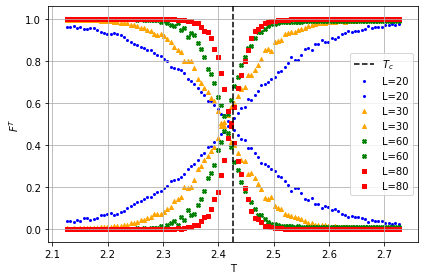

In [6]:
for i, L in enumerate(Ls):
    # plt.scatter(T, errs(errs_[i]), marker=markers[i], s=16, label=f'L={L}', c=colors[i])
    plt.scatter(T, errs(outs_[i][:, 0]), marker=markers[i], label=f'L={L}', c=colors[i], s=16)
    plt.scatter(T, errs(outs_[i][:, 1]), marker=markers[i], label=f'L={L}', c=colors[i], s=16)
    # plt.scatter(T, stds_err(outs_[i][:, 0]), marker=markers[i], label=f'L={L}', c=colors[i])


    # ax[1].axvline(x=T_c, color='black', linestyle='--')
    # ax[2].axvline(x=T_c, color='black', linestyle='--')

    plt.xlabel('T')
    # plt.ylabel('$\overline{Q^T}$')
    # ax[1].set_ylabel('Predictions of NN')
    plt.ylabel('$F^T$')
    
plt.axvline(x=T_c, color='black', linestyle='--', label='$T_c$')
#plt.setp(ax, title=f' = {M}')
plt.legend()
plt.tight_layout()
#plt.xlim(T_c-0.1, T_c+0.1)
#plt.show()
#plt.savefig(f'images/{Jd}_100_pred_opt_epoch.png', bbox_inches='tight')

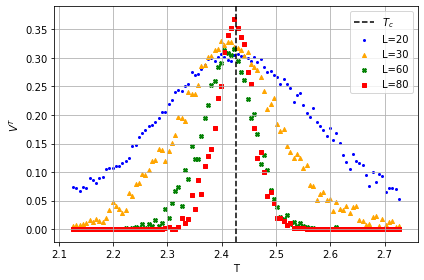

In [7]:
markers=['.', '^', 'X', 's', '*']
colors=['blue', 'orange', 'green', 'red', 'm']

for i, L in enumerate(Ls):
    # plt.scatter(T, errs(errs_[i]), marker=markers[i], s=16, label=f'L={L}', c=colors[i])
    # ax[1].scatter(T, errs(outs_[i][:, 0]), marker='o', s=16, c=f'C{i+1}')
    # ax[1].scatter(T, errs(outs_[i][:, 1]), marker='o', s=16, c=f'C{i+1}')
    plt.scatter(T, stds_err(outs_[i][:, 0]), marker=markers[i], label=f'L={L}', c=colors[i], s=16)


    # ax[1].axvline(x=T_c, color='black', linestyle='--')
    # ax[2].axvline(x=T_c, color='black', linestyle='--')

    plt.xlabel('T')
    # plt.ylabel('$\overline{Q^T}$')
    # ax[1].set_ylabel('Predictions of NN')
    plt.ylabel('$V^T$')
    
plt.axvline(x=T_c, color='black', linestyle='--', label='$T_c$')
#plt.setp(ax, title=f'M = {M}')
plt.legend()
plt.tight_layout()
#plt.xlim(T_c-0.1, T_c+0.1)
#plt.show()
#plt.savefig(f'images/{Jd}_100_err_opt_epoch.png', bbox_inches='tight')

In [2]:
import json

# $L $Jd $idx $num_temps $num_conf $opt
dct = {
    "L": 20,
    "Jd": 1.0,
    "num_temps": 100,
    "num_conf": 512,
    "opt": 'test'
}

with open("params.json", "w") as file:
    json.dump(dct, file)